In [12]:
!pip install sgp4
!pip install pandas
!pip install sgp4 pandas openpyxl
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
from sgp4.api import Satrec
from datetime import datetime, timedelta
import pandas as pd
from sgp4.api import jday

In [9]:
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'

sat = Satrec.twoline2rv(line1, line2)

base_time = datetime.utcnow()
interval = 30
samples = 200
data = []

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = jday(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second + dt.microsecond / 1e6)
    e, r, v = sat.sgp4(jd, fr)
    
    if e == 0:
        data.append({
            "timestamp": dt.isoformat(),
            "x_km": r[0],
            "y_km": r[1],
            "z_km": r[2],
            "vx_km_s": v[0],
            "vy_km_s": v[1],
            "vz_km_s": v[2],
        })

df = pd.DataFrame(data)
df.to_excel("dados_iss_propagados.xlsx", index=False)
print("✅ Excel salvo com sucesso.")


C:\Users\jaysa\AppData\Local\Temp\ipykernel_8248\1706151174.py:6: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


ModuleNotFoundError: No module named 'openpyxl'

In [16]:
from sgp4.api import Satrec, jday
from datetime import datetime, timedelta
import pandas as pd
from datetime import timezone

# TLE da ISS - Abril 2024
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'

# Satélite a partir do TLE
sat = Satrec.twoline2rv(line1, line2)

# Gerar dados
base_time = datetime.now(timezone.utc)
interval = 30  # segundos
samples = 200
data = []

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = jday(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second + dt.microsecond / 1e6)
    e, r, v = sat.sgp4(jd, fr)
    if e == 0:
        data.append({
            "timestamp": dt.isoformat(),
            "x_km": r[0],
            "y_km": r[1],
            "z_km": r[2],
            "vx_km_s": v[0],
            "vy_km_s": v[1],
            "vz_km_s": v[2],
        })

# Salvar como Excel
df = pd.DataFrame(data)
df.to_excel("data/dados_iss_propagados.xlsx", index=False)
print("✅ Arquivo salvo em data/dados_iss_propagados.xlsx")


OSError: Cannot save file into a non-existent directory: 'data'

In [17]:
from sgp4.api import Satrec, jday
from datetime import datetime, timedelta
import pandas as pd
import os
from datetime import timezone

# TLE da ISS - Abril 2024
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'

# Satélite a partir do TLE
sat = Satrec.twoline2rv(line1, line2)

# Gerar dados
base_time = datetime.now(timezone.utc)
interval = 30  # segundos
samples = 200
data = []

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = jday(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second + dt.microsecond / 1e6)
    e, r, v = sat.sgp4(jd, fr)
    if e == 0:
        data.append({
            "timestamp": dt.isoformat(),
            "x_km": r[0],
            "y_km": r[1],
            "z_km": r[2],
            "vx_km_s": v[0],
            "vy_km_s": v[1],
            "vz_km_s": v[2],
        })

# Verificar se o diretório 'data' existe, caso contrário, criar
os.makedirs('data', exist_ok=True)

# Salvar como Excel
df = pd.DataFrame(data)
df.to_excel("data/dados_iss_propagados.xlsx", index=False)
print("✅ Arquivo salvo em data/dados_iss_propagados.xlsx")


✅ Arquivo salvo em data/dados_iss_propagados.xlsx


In [23]:
from sgp4.api import Satrec
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from sgp4.api import jday 

# TLE da ISS (exemplo)
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'

# Criando satélite a partir do TLE
sat = Satrec.twoline2rv(line1, line2)

# Criar série temporal
base_time = datetime.utcnow()
interval = 30  # intervalo de 30 segundos entre amostras
samples = 200  # quantidade de amostras

# Lista para armazenar os dados
data = []

def euler_to_quaternion(roll, pitch, yaw):
    """
    Converte os ângulos de Euler (roll, pitch, yaw) em quaternions.
    """
    cy = np.cos(yaw * 0.5)
    sy = np.sin(yaw * 0.5)
    cp = np.cos(pitch * 0.5)
    sp = np.sin(pitch * 0.5)
    cr = np.cos(roll * 0.5)
    sr = np.sin(roll * 0.5)

    q0 = cr * cp * cy + sr * sp * sy
    q1 = sr * cp * cy - cr * sp * sy
    q2 = cr * sp * cy + sr * cp * sy
    q3 = cr * cp * sy - sr * sp * cy

    return q0, q1, q2, q3

# Gerar os dados
for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = jday(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second + dt.microsecond / 1e6)
    error_code, position, velocity = sat.sgp4(jd, fr)

    if error_code == 0:
        # Calcular os ângulos de Euler para orientação do satélite
        roll = np.arctan2(position[1], position[2])  # Exemplo de cálculo simples de Euler
        pitch = np.arctan2(position[0], np.sqrt(position[1]**2 + position[2]**2))
        yaw = np.arctan2(velocity[0], velocity[1])

        # Converter os ângulos de Euler para Quaternions
        q0, q1, q2, q3 = euler_to_quaternion(roll, pitch, yaw)

        # Calcular a velocidade angular
        omega_x = velocity[0]  # Exemplo de derivada da posição para velocidade angular
        omega_y = velocity[1]
        omega_z = velocity[2]

        data.append({
            'timestamp': dt.isoformat(),
            'x_km': position[0],
            'y_km': position[1],
            'z_km': position[2],
            'vx_km_s': velocity[0],
            'vy_km_s': velocity[1],
            'vz_km_s': velocity[2],
            'omega_x': omega_x,
            'omega_y': omega_y,
            'omega_z': omega_z,
            'q0': q0,
            'q1': q1,
            'q2': q2,
            'q3': q3
        })

# Converter em DataFrame
df = pd.DataFrame(data)

# Salvar como Excel
df.to_excel("dados_satellite_IA.xlsx", index=False)

print("✅ Dados salvos com sucesso em 'dados_iss_propagados.xlsx'")


✅ Dados salvos com sucesso em 'dados_iss_propagados.xlsx'


C:\Users\jaysa\AppData\Local\Temp\ipykernel_8248\1327075019.py:15: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


In [24]:
import os
print(os.getcwd())

c:\Users\jaysa\Documents\GitHub\GyroAI-SAT\notebooks


In [26]:
from sgp4.api import Satrec, jday
from datetime import datetime, timedelta
import pandas as pd
import os
from IPython.display import display

# --- Função auxiliar para conversão da data em juliano ---
def datetime_to_julian_date(dt):
    """Converte datetime para julian date e fração para uso com sgp4"""
    year, month, day = dt.year, dt.month, dt.day
    hour, minute = dt.hour, dt.minute
    second = dt.second + dt.microsecond / 1e6
    jd, fr = jday(year, month, day, hour, minute, second)
    return jd, fr

# Criar pasta de destino, se não existir
os.makedirs("data", exist_ok=True)

# TLE da ISS (exemplo real; pode trocar por outro)
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'

# Criar objeto satélite a partir do TLE
sat = Satrec.twoline2rv(line1, line2)

# Parâmetros da série temporal
base_time = datetime.utcnow()
interval = 30  # segundos entre amostras
samples = 200  # número de amostras

data = []

# Loop para gerar dados
for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = datetime_to_julian_date(dt)
    error_code, position, velocity = sat.sgp4(jd, fr)

    if error_code == 0:
        data.append({
            'timestamp': dt.isoformat(),
            'x_km': position[0],
            'y_km': position[1],
            'z_km': position[2],
            'vx_km_s': velocity[0],
            'vy_km_s': velocity[1],
            'vz_km_s': velocity[2]
        })

# Criar DataFrame com os dados orbitais
df = pd.DataFrame(data)

# Salvar como Excel
output_path = "data/dados_satellite_IA.xlsx"
df.to_excel(output_path, index=False)

# Mensagem de sucesso
print(f"✅ Arquivo salvo com sucesso: {output_path}")

# Mostrar amostra no notebook
display(df.head())



C:\Users\jaysa\AppData\Local\Temp\ipykernel_8248\3224304223.py:27: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


✅ Arquivo salvo com sucesso: data/dados_satellite_IA.xlsx


,timestamp,x_km,y_km,z_km,vx_km_s,vy_km_s,vz_km_s
0,2025-04-18T20:38:21.632399,4266.751111,3664.869578,3731.481064,-5.886368,2.491733,4.272012
1,2025-04-18T20:38:51.632399,4087.710176,3737.470616,3857.433428,-6.048682,2.347917,4.124145
2,2025-04-18T20:39:21.632399,3903.905350,3805.715905,3978.877242,-6.203936,2.201375,3.971468
3,2025-04-18T20:39:51.632399,3715.551170,3869.526224,4095.670894,-6.351949,2.052278,3.814160
4,2025-04-18T20:40:21.632399,3522.867450,3928.827543,4207.678236,-6.492549,1.900801,3.652407


In [28]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 1.2 MB/s eta 0:00:34
   - -------------------------------------- 1.0/41.0 MB 1.7 MB/s eta 0:00:24
   - -------------------------------------- 1.8/41.0 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/41.0 MB 2.5 MB/s eta 0:00:16
   --- ------------------------------------ 3.4/41.0 MB 2.8 MB/s eta 0:00:14
   ---- ----------------------------------- 4.5/41.0 MB 3.1 MB/s eta 0:00:12
   ----- ---------------------------------- 5.5/41.0 MB 3.4 MB/s eta 0:00:11
   ------ --------------------------------- 6.8/41.0 MB 3.7 MB/s eta 0:00:10
   ------- -------------------------------- 7.9/41.0 MB 3.9 MB/s eta 0:00:09
   -------- ------------------------------- 9.2/41.0 MB 4.0 MB/s eta 0:00:08
   ---------

In [38]:
import os
from sgp4.api import Satrec
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

# Verificar o diretório atual para entender onde o arquivo será salvo
print("Diretório atual:", os.getcwd())

# TLE da ISS (pode trocar por outro satélite depois)
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'
sat = Satrec.twoline2rv(line1, line2)

# Função para converter datetime em Julian date
def datetime_to_julian_date(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute = dt.hour, dt.minute
    second = dt.second + dt.microsecond / 1e6
    jd = 367 * year - int((7 * (year + int((month + 9) / 12))) / 4) \
         + int((275 * month) / 9) + day + 1721013.5 \
         + (hour + minute / 60 + second / 3600) / 24
    fr = (hour + minute / 60 + second / 3600) / 24 % 1
    return jd, fr

# Gerar os dados
base_time = datetime.utcnow()
interval = 30  # segundos
samples = 200
data = []

print("Iniciando a propagação dos dados...")

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = datetime_to_julian_date(dt)
    error_code, position, velocity = sat.sgp4(jd, fr)

    if error_code != 0:
        print(f"Erro na propagação dos dados para o tempo {dt}: código {error_code}")
        continue

    # Adicionar dados
    r = np.array(position)
    v = np.array(velocity)

    z = -r / np.linalg.norm(r)
    y = np.cross(z, v)
    y /= np.linalg.norm(y)
    x = np.cross(y, z)

    rot_matrix = np.vstack([x, y, z]).T
    rotation = R.from_matrix(rot_matrix)

    quat = rotation.as_quat()  # w, x, y, z
    euler = rotation.as_euler('xyz', degrees=True)

    data.append({
        'timestamp': dt.isoformat(),
        'x_km': r[0], 'y_km': r[1], 'z_km': r[2],
        'vx_km_s': v[0], 'vy_km_s': v[1], 'vz_km_s': v[2],
        'q0': quat[3], 'q1': quat[0], 'q2': quat[1], 'q3': quat[2],
        'roll_deg': euler[0], 'pitch_deg': euler[1], 'yaw_deg': euler[2]
    })

# Verificando se dados foram coletados
if not data:
    print("Nenhum dado foi coletado.")
else:
    print(f"Dados coletados: {len(data)} amostras.")

# Criar DataFrame e salvar
df = pd.DataFrame(data)

# Verificar o caminho atual e salvar no diretório correto
output_path = os.path.join(os.getcwd(), "dados_iss_propagados.xlsx")
df.to_excel(output_path, index=False)

print(f"✅ Arquivo salvo em: {output_path}")

Diretório atual: c:\Users\jaysa\Documents\GitHub\GyroAI-SAT\notebooks
Iniciando a propagação dos dados...
Dados coletados: 200 amostras.
✅ Arquivo salvo em: c:\Users\jaysa\Documents\GitHub\GyroAI-SAT\notebooks\dados_iss_propagados.xlsx


C:\Users\jaysa\AppData\Local\Temp\ipykernel_8248\714683366.py:28: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


In [39]:
import os
from sgp4.api import Satrec
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

# Verificar o diretório atual para entender onde o arquivo será salvo
print("Diretório atual:", os.getcwd())

# TLE da ISS (pode trocar por outro satélite depois)
line1 = '1 25544U 98067A   24106.45347222  .00012190  00000+0  21377-3 0  9992'
line2 = '2 25544  51.6414  52.8843 0003046  96.6780  42.0736 15.51762384294959'
sat = Satrec.twoline2rv(line1, line2)

# Função para converter datetime em Julian date
def datetime_to_julian_date(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute = dt.hour, dt.minute
    second = dt.second + dt.microsecond / 1e6
    jd = 367 * year - int((7 * (year + int((month + 9) / 12))) / 4) \
         + int((275 * month) / 9) + day + 1721013.5 \
         + (hour + minute / 60 + second / 3600) / 24
    fr = (hour + minute / 60 + second / 3600) / 24 % 1
    return jd, fr

# Gerar os dados
base_time = datetime.utcnow()
interval = 30  # segundos
samples = 200
data = []

print("Iniciando a propagação dos dados...")

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = datetime_to_julian_date(dt)
    error_code, position, velocity = sat.sgp4(jd, fr)

    if error_code != 0:
        print(f"Erro na propagação dos dados para o tempo {dt}: código {error_code}")
        continue

    # Adicionar dados
    r = np.array(position)
    v = np.array(velocity)

    z = -r / np.linalg.norm(r)
    y = np.cross(z, v)
    y /= np.linalg.norm(y)
    x = np.cross(y, z)

    rot_matrix = np.vstack([x, y, z]).T
    rotation = R.from_matrix(rot_matrix)

    quat = rotation.as_quat()  # w, x, y, z
    euler = rotation.as_euler('xyz', degrees=True)

    data.append({
        'timestamp': dt.isoformat(),
        'x_km': r[0], 'y_km': r[1], 'z_km': r[2],
        'vx_km_s': v[0], 'vy_km_s': v[1], 'vz_km_s': v[2],
        'q0': quat[3], 'q1': quat[0], 'q2': quat[1], 'q3': quat[2],
        'roll_deg': euler[0], 'pitch_deg': euler[1], 'yaw_deg': euler[2]
    })

# Verificando se dados foram coletados
if not data:
    print("Nenhum dado foi coletado.")
else:
    print(f"Dados coletados: {len(data)} amostras.")

# Criar DataFrame e salvar
df = pd.DataFrame(data)

# Verificar ou criar a pasta 'data' se não existir
data_folder = os.path.join(os.getcwd(), 'data')
if not os.path.exists(data_folder):
    os.makedirs(data_folder)  # Cria a pasta 'data' se ela não existir

# Definir o caminho do arquivo Excel na pasta 'data'
output_path = os.path.join(data_folder, "dados_iss_propagados.xlsx")
df.to_excel(output_path, index=False)

print(f"✅ Arquivo salvo em: {output_path}")


Diretório atual: c:\Users\jaysa\Documents\GitHub\GyroAI-SAT\notebooks
Iniciando a propagação dos dados...
Dados coletados: 200 amostras.
✅ Arquivo salvo em: c:\Users\jaysa\Documents\GitHub\GyroAI-SAT\notebooks\data\dados_iss_propagados.xlsx


C:\Users\jaysa\AppData\Local\Temp\ipykernel_8248\628367317.py:28: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


C:\Users\jaysa\AppData\Local\Temp\ipykernel_16028\397302607.py:30: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  base_time = datetime.utcnow()


Arquivo salvo em: data\dados_iss_propagados.xlsx


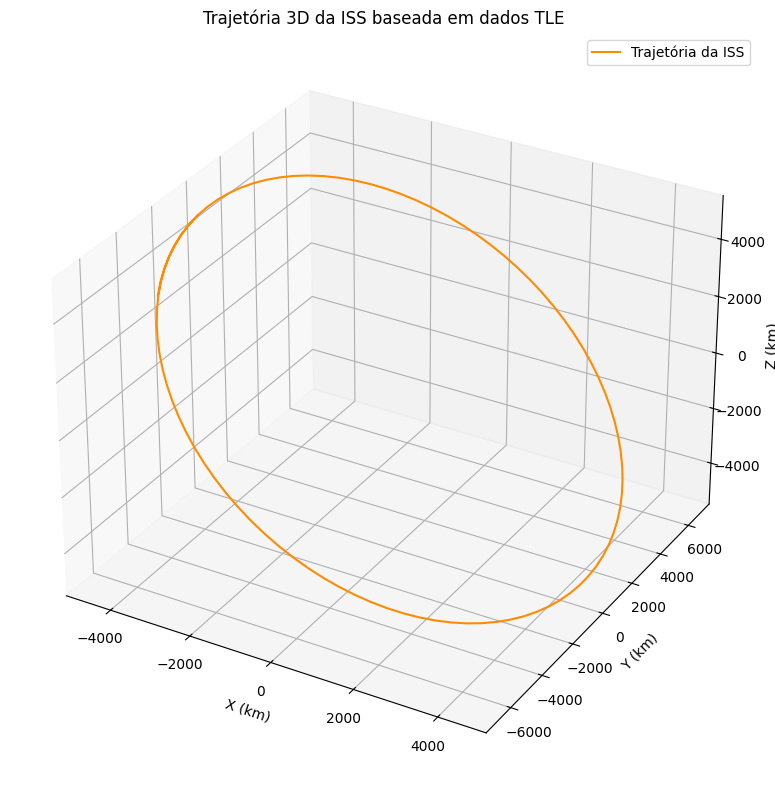

In [1]:
# ainda preciso testar

import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sgp4.api import Satrec
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

# Criar a pasta 'data' se não existir
os.makedirs("data", exist_ok=True)

# Dados TLE da ISS
tle_line1 = "1 25544U 98067A   24107.78435279  .00013659  00000+0  25179-3 0  9996"
tle_line2 = "2 25544  51.6400 109.5033 0003703  23.8323  60.4281 15.50770457443468"

sat = Satrec.twoline2rv(tle_line1, tle_line2)

# Converter datetime para julian date
def datetime_to_julian_date(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute = dt.hour, dt.minute
    second = dt.second + dt.microsecond / 1e6
    jd = 367 * year - int((7 * (year + int((month + 9) / 12))) / 4) + int((275 * month) / 9) + day + 1721013.5
    fr = (hour + minute / 60 + second / 3600) / 24
    return jd, fr

# Simulação
base_time = datetime.utcnow()
samples = 100
interval = 60  # segundos
dados = []

for i in range(samples):
    dt = base_time + timedelta(seconds=i * interval)
    jd, fr = datetime_to_julian_date(dt)
    error_code, position, velocity = sat.sgp4(jd, fr)

    if error_code == 0:
        x, y, z = position  # km
        vx, vy, vz = velocity  # km/s

        # Cálculo aproximado dos ângulos de Euler com base na velocidade
        rot = R.from_rotvec([vx, vy, vz])
        euler_angles = rot.as_euler('xyz', degrees=True)

        dados.append({
            "datetime": dt,
            "x_km": x,
            "y_km": y,
            "z_km": z,
            "vx_km_s": vx,
            "vy_km_s": vy,
            "vz_km_s": vz,
            "roll": euler_angles[0],
            "pitch": euler_angles[1],
            "yaw": euler_angles[2],
        })

# Salvar os dados
df = pd.DataFrame(dados)
caminho_arquivo = os.path.join("data", "dados_iss_propagados.xlsx")
df.to_excel(caminho_arquivo, index=False)
print(f"Arquivo salvo em: {caminho_arquivo}")

# Plotar a trajetória
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df["x_km"], df["y_km"], df["z_km"], color="darkorange", label="Trajetória da ISS")

ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
ax.set_title("Trajetória 3D da ISS baseada em dados TLE")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
